# Project 4 - West-Nile Virus Prediction 

#### Summary
- We have performed following steps so far
    - 1- Data Collection and Cleaning (Pl refer to 1_data_gathering_and_cleaning.ipynb for details)
    - 2- EDA and Feature Engineering  (Pl refer to 2_eda_feature_engineering.ipynb for details)
    - 3- Modeling and Evaluation  (Pl refer to 3_modelling and eval.ipynb for details)


- In this notebook, we focus on Cost Benefit Analysis of using the recommended model(s) to predict number of cases and possible costs. We will assess the cost and benefits to see if indeed spraying of insecticide should really help in lowering the cases of West Nile Virus by reducing the number of mosquitos carrying virus.  

__Table of Contents:__
- [1. Import Libraries and Load Data](#1.-Import-Libraries-and-Load-Data)
- [2. Data Analysis](#2.-Data-Analysis)
- [3. Spray characteristics](#3.-Spray-characteristics)
- [4. Effectiveness of spray on number of mosquitos](#4.-Effectiveness-of-spray-on-number-of-mosquitos)
- [5. Benefits and Costs](#5.-Benefits-and-Costs)
- [5.1 Benefits](#5.1-Benefits)
- [5.2 Costs](#5.2-Costs)
- [5.3 Projected cases of West Nile Virus](#5.3-Projected-cases-of-West-Nile-Virus)
- [5.4 Further work](#5.4-Further-work)
- [6. Conclusion](#6.-Conclusion)


# 1. Import Libraries and Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from math import sin, cos, sqrt, atan2, radians


%matplotlib inline
plt.style.use('seaborn')
#pandas options
pd.set_option('display.max_columns', 500)

In [110]:
# import the cleaned spray dataset
df_spray = pd.read_pickle('../assets/spray_clean.pkl')

# import the processed train/test datasets (with all columns before feature reduction)
df_train = pd.read_pickle('../assets/train_processed.pkl') #('../assets/train_final.pkl')
df_test  = pd.read_pickle('../assets/test_processed.pkl')

#import the predicted file of submission to validate the effectiveness of predictions
tst_pred_prob = pd.read_csv('../assets/submission/balanced_proba_lr.csv') 

## 2. Data Analysis

### Spray

In [77]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,18:56:58,42.391623,-88.089163
1,2011-08-29,18:57:08,42.391348,-88.089163
2,2011-08-29,18:57:18,42.391022,-88.089157
3,2011-08-29,18:57:28,42.390637,-88.089158
4,2011-08-29,18:57:38,42.390410,-88.088858


In [78]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null datetime64[ns]
Time         14835 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [79]:
df_spray[df_spray['Time'].isnull()]

,Date,Time,Latitude,Longitude


In [80]:
#df_spray['Date'] = pd.to_datetime(df_spray['Date'])
#df_spray['Time'] = pd.to_datetime(df_spray['Time'],format= '%I:%M:%S %p').dt.time

In [81]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null datetime64[ns]
Time         14835 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [82]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,18:56:58,42.391623,-88.089163
1,2011-08-29,18:57:08,42.391348,-88.089163
2,2011-08-29,18:57:18,42.391022,-88.089157
3,2011-08-29,18:57:28,42.390637,-88.089158
4,2011-08-29,18:57:38,42.390410,-88.088858


In [83]:
df_spray.sort_values(by=['Date', 'Time'])

,Date,Time,Latitude,Longitude
0,2011-08-29,18:56:58,42.391623,-88.089163
1,2011-08-29,18:57:08,42.391348,-88.089163
2,2011-08-29,18:57:18,42.391022,-88.089157
3,2011-08-29,18:57:28,42.390637,-88.089158
4,2011-08-29,18:57:38,42.390410,-88.088858
...,...,...,...,...
14601,2013-09-05,20:40:16,42.001388,-87.811297
14602,2013-09-05,20:40:26,42.000962,-87.811843
14603,2013-09-05,20:40:36,42.000553,-87.812330
14604,2013-09-05,20:40:46,42.000955,-87.813083


In [84]:
df_spray_agg = df_spray.groupby('Date').count()['Latitude'].to_frame()

In [85]:
df_spray_agg.columns = ['spray_locations']
df_spray_agg.sort_index()

,spray_locations
Date,
2011-08-29,95
2011-09-07,2114
2013-07-17,2202
2013-07-25,1607
2013-08-08,1195
2013-08-15,2668
2013-08-16,141
2013-08-22,1587
2013-08-29,2302


In [86]:
df_spray_agg.index

DatetimeIndex(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
               '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
               '2013-08-29', '2013-09-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Train data and test

In [111]:
display (df_train.head())
display (df_test.head())

,Date,Address,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,Sign,FU,HZ,RA,VCTS,SN,No,DZ,VCFG,FG+,BR,TSRA,MIFG,FG,TS,GR,BCFG,SQ,Year,Month,Week,Day,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41.954690,-87.800991,9,1.0,0,1,88,60,74,10,58,65,0,9,421,1917,0,0,0.0,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2007,5,22,29,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41.954690,-87.800991,9,1.0,0,1,88,60,74,10,58,65,0,9,421,1917,0,0,0.0,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2007,5,22,29,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",41.994991,-87.769279,9,1.0,0,1,88,60,74,10,58,65,0,9,421,1917,0,0,0.0,0.0,29.39,30.

,Date,Address,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,Sign,FU,HZ,RA,VCTS,SN,No,DZ,VCFG,FG+,BR,TSRA,MIFG,FG,TS,GR,BCFG,SQ,Year,Month,Week,Day,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Id,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41.95469,-87.800991,9,NaN,1,86,61,74,7,56,64,0,9,416,1926,0,0,0.0,0.0,29.28,29.99,8.9,18,10.0,18,10,53,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2008,6,24,11,0.0,0.14,1.24,0.11,0.0,0.64,0.0,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3683.663359,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41.95469,-87.800991,9,NaN,1,86,61,74,7,56,64,0,9,416,1926,0,0,0.0,0.0,29.28,29.99,8.9,18,10.0,18,10,53,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2008,6,24,11,0.0,0.14,1.24,0.11,0.0,0.64,0.0,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3683.663359,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41.95469,-87.800991,9,NaN,1,86,61,74,7,56,64,0,9,416,1926,0,0,0.0,0.0,29.28,29.99,8.9,18,

## 3. Spray characteristics

__Spray type__

Zenivex™ has been used effectively to control disease-carrying __adult__ mosquitoes and is non-persistent, decomposing rapidly in the environment.

__Spray Contractor__: Vector Disease Control 

__Spray application__

- When West Nile Virus gets worse at a certain area
- 1.5 fluid ounces per acre
- Apply to wind speeds >= 1mph <= 10 mph
- Use a vehicle-mounted cold aerosol ULV sprayer to apply the product

https://mikenowak.net/radio/how-effective-is-urban-mosquito-control/

https://www.centralmosquitocontrol.com/

## 4. Effectiveness of spray on number of mosquitos

In [112]:
#calc of distance using harvine's formula
def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #distance in km
    distance = R * c

    return round(distance, 4)

In [113]:
df_spray['year'] = df_spray['Date'].dt.year
df_spray['month'] = df_spray['Date'].dt.month
df_spray['week'] = df_spray['Date'].dt.week
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month
df_train['week'] = df_train['Date'].dt.week

In [114]:
def draw_countplot(df, x, title, xlabel = None, ylabel = 'Number of Observations', hue = 'WnvPresent', loc = 'upper right', annot = True):
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.set_style("white")
    sns.countplot(x = x, hue = hue, data = df, dodge = True, palette = ['blue', 'red'])
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20)
    ax.set_xlabel(xlabel, fontsize = 20)
    legend = plt.legend(loc = loc)
    legend.get_texts()[0].set_text('West Nile Virus Not Detected')
    legend.get_texts()[1].set_text('West Nile Virus Detected')
    
    if annot == True:
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', size = 10)

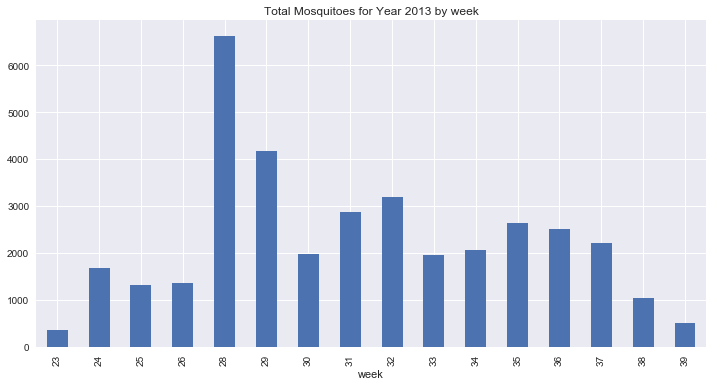

In [115]:
df_train[df_train['year'] == 2013].groupby(['week'])['NumMosquitos'].sum().plot(kind = 'bar', title = 'Total Mosquitoes for Year 2013 by week', figsize = (12, 6));

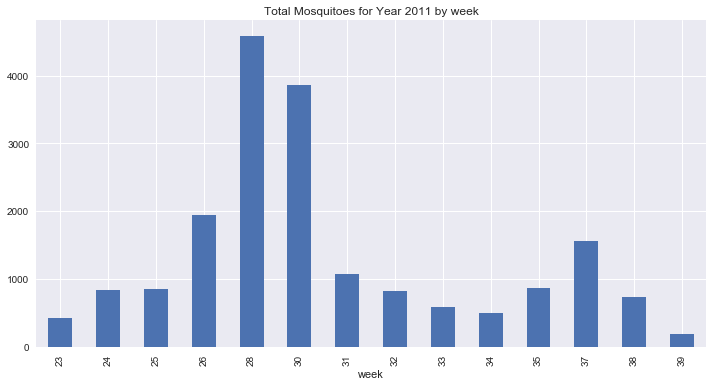

In [116]:
df_train[df_train['year'] == 2011].groupby(['week'])['NumMosquitos'].sum().plot(kind = 'bar', title = 'Total Mosquitoes for Year 2011 by week', figsize = (12, 6));

In [117]:
df_spray[(df_spray['year']== 2013) & (df_spray['week']== 29)].head()

,Date,Time,Latitude,Longitude,year,month,week
2209,2013-07-17,19:45:45,41.997728,-87.767532,2013,7,29
2210,2013-07-17,19:45:55,41.997990,-87.768085,2013,7,29
2211,2013-07-17,19:46:05,41.998237,-87.768623,2013,7,29
2212,2013-07-17,19:46:15,41.998510,-87.769225,2013,7,29
2213,2013-07-17,19:46:25,41.998793,-87.769833,2013,7,29


A spray was performed on week 29 in 2013, and we can see that the population of mosquitos decreased after the spray. 

Most people who become infected with West Nile virus have mild symptoms Typically less than 1% develop severe neroinvasive disease, according to CDC.

We can look into the cost of each spraying session and determine if the costs covers the risks or consider other alternative

We have seleced the model which has higher recall and less false negative. The cost of predicting a negative observation which turns out to be positive is higher when life is involved.

After addressing immediate short term goals, we can take data about birds species known to carry West Nile Virus as birds are also a factor that comes into play.  

Most people who become infected with West Nile Virus has mild flu like symptoms and typically less than 1% develop severe neroinvasive disease according to CDC

It is subjective to determine the ROI or perform a cost benefit anaysis when lives are at risk. There are different school of thoughts. We can look into how much it costs for Chicago during each spraying session and determine  the associated risks of missing on sprays. We can also consider other alternative instead of spraying during peak seasons to mitigate the risks and only perform spraying when it is absolutely necessary.

In [118]:
df_after_spray_final = pd.DataFrame(columns=['last_spray_date', 'spray_lat', 'spray_lng', 'tr_date', 'tr_lat', 'tr_lng' , 'num_mosquitos'])

In [119]:
for i in range(df_spray.shape[0]): #loop thru spray date
        spray_date = df_spray.loc[i, 'Date']
        spray_lat = df_spray.loc[i, 'Latitude']
        spray_lon = df_spray.loc[i, 'Longitude']
        
        tr_coincide = df_train[(df_train['Date'] > spray_date)].reset_index()
        for j in range(tr_coincide.shape[0]): #loop thru train 
            tr_date = tr_coincide.loc[j, 'Date']
            tr_lat = tr_coincide.loc[j, 'Latitude']
            tr_lon = tr_coincide.loc[j, 'Longitude']
            num_mosquito = tr_coincide.loc[j, 'NumMosquitos']
            if calc_dist_chk(tr_lat, tr_lon, spray_lat, spray_lon) < 0.2:
                print('Spray near traps')
                df_after_spray_final = df_after_spray_final.append({'last_spray_date': spray_date,
                                      'spray_lat': spray_lat,
                                      'spray_lng': spray_lon,
                                      'tr_date':  tr_date,
                                      'tr_lat': tr_lat,
                                      'tr_lng': tr_lon,
                                        'num_mosquitos': num_mosquito}, ignore_index=True)

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

In [120]:
df_train[(df_train['Date']>='2013-01-01') & (df_train['WnvPresent'] == 1)]

,Date,Address,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,Sign,FU,HZ,RA,VCTS,SN,No,DZ,VCFG,FG+,BR,TSRA,MIFG,FG,TS,GR,BCFG,SQ,Year,Month,Week,Day,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,year,month,week
8490,2013-06-28,"1700 West 95th Street, Chicago, IL 60643, USA",41.720848,-87.666014,9,38.0,1,2,83,68,76,4,60,65,0,11,419,1931,0,0,0.0,0.16,28.97,29.62,9.0,29,9.8,16,11,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,6,26,28,0.59,0.19,0.00,0.14,0.0,0.00,0.11,65.0,65.0,67.0,65.0,66.0,65.0,63.0,79.0,75.0,79.0,77.0,79.0,77.0,78.0,69.0,68.0,71.0,69.0,70.0,69.0,67.0,-3657.500445,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,6,26
8691,2013-07-12,"8900 South Carpenter Street, Chicago, IL 60620...",41.732984,-87.649642,8,27.0,1,2,82,60,71,-2,54,62,0,6,427,1928,0,0,0.0,0.00,29.44,30.09,4.1,8,5.4,17,9,55,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,7,28,12,0.00,0.00,0.01,0.84,0.0,0.00,0.00,52.0,65.0,72.0,70.0,66.0,63.0,60.0,72.0,77.0,80.0,79.0,80.0,77.0,75.0,61.0,69.0,75.0,72.0,71.0,68.0,66.0,-3657.881107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,7,28
8715,2013-07-12,"3500 West 116th Street, Chicago, IL 60655, USA",41.682587,-87.707973,9,36.0,1,2,82,

In [121]:
#only want those observations which are after spray date
df_after_spray_final = df_after_spray_final[(df_after_spray_final['tr_date'] > df_after_spray_final['last_spray_date'])]

In [122]:
df_after_spray_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 0 to 3295
Data columns (total 7 columns):
last_spray_date    3296 non-null datetime64[ns]
spray_lat          3296 non-null float64
spray_lng          3296 non-null float64
tr_date            3296 non-null datetime64[ns]
tr_lat             3296 non-null float64
tr_lng             3296 non-null float64
num_mosquitos      3296 non-null float64
dtypes: datetime64[ns](2), float64(5)
memory usage: 206.0 KB


In [123]:
#Convert num_mosquitos datatype to integer
df_after_spray_final['num_mosquitos'] = df_after_spray_final['num_mosquitos'].astype(int)

In [124]:
df_after_spray_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 0 to 3295
Data columns (total 7 columns):
last_spray_date    3296 non-null datetime64[ns]
spray_lat          3296 non-null float64
spray_lng          3296 non-null float64
tr_date            3296 non-null datetime64[ns]
tr_lat             3296 non-null float64
tr_lng             3296 non-null float64
num_mosquitos      3296 non-null int32
dtypes: datetime64[ns](2), float64(4), int32(1)
memory usage: 193.1 KB


In [125]:
df_after_spray_final.num_mosquitos.head()

0     8
1     2
2     9
3     7
4    24
Name: num_mosquitos, dtype: int32

In [126]:
df_after_spray_final.groupby('tr_date').sum()

,spray_lat,spray_lng,tr_lat,tr_lng,num_mosquitos
tr_date,,,,,
2011-09-12,671.586747,-1404.868027,671.581520,-1404.880944,80
2011-09-16,671.586747,-1404.868027,671.581520,-1404.880944,128
2011-09-23,671.586747,-1404.868027,671.581520,-1404.880944,208
2011-09-30,671.586747,-1404.868027,671.581520,-1404.880944,56
2013-06-07,335.793373,-702.434013,335.790760,-702.440472,16
2013-06-14,671.586747,-1404.868027,671.581520,-1404.880944,232
2013-06-21,671.586747,-1404.868027,671.581520,-1404.880944,72
2013-06-27,671.586747,-1404.868027,671.581520,-1404.880944,88
2013-07-08,335.793373,-702.434013,335.790760,-702.440472,8


In [127]:
num_mos_nearby = df_after_spray_final.groupby('tr_date').sum()['num_mosquitos'].to_frame()
display(num_mos_nearby)
display(df_spray_agg.index)

,num_mosquitos
tr_date,
2011-09-12,80
2011-09-16,128
2011-09-23,208
2011-09-30,56
2013-06-07,16
2013-06-14,232
2013-06-21,72
2013-06-27,88
2013-07-08,8


DatetimeIndex(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
               '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
               '2013-08-29', '2013-09-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

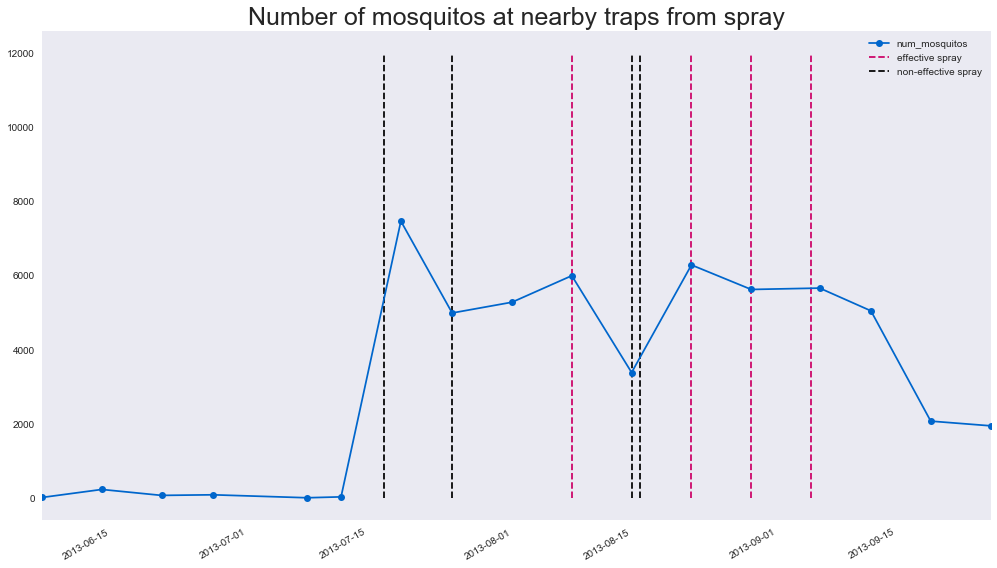

In [128]:
num_mos_nearby['2013'].plot(figsize=(17,10), marker='o', color='#0066cc');
plt.vlines(['2013-08-08','2013-08-22', '2013-08-29', '2013-09-05'], ymin=0, ymax=12000, linestyles='dashed', color='#cc0066', label='effective spray');
plt.vlines(['2013-07-17', '2013-07-25', '2013-08-15', '2013-08-16'], ymin=0, ymax=12000, linestyles='dashed', label='non-effective spray');
plt.title("Number of mosquitos at nearby traps from spray", size=25);
plt.xlabel("")
plt.grid(b=False)
plt.legend();

This plot shows if spraying helps to decrease the total number of mosquitos. Four sprays, for example in July 17 and end July of 2013 does not result in the decrease of mosquitos while the other 4 sprays actually do have an effect in the decrease of the mosquito population. 

We can thus conclude that it still helps to decrease the mosquito popluation. 

## 5. Benefits and Costs

### 5.1 Benefits

- Lowers the number of mosquitos which are carriers of not only West Nile virus but also other vector bourne diseases such as Zika 
- Lower the high costs of possible medical and hospitalisation fees
- Reduce costs of the state to handle such outbreaks and emergencies

### 5.2 Costs

We know what the benefits are and obviously lowering the occurence of virus will be beneficial for the population of Chicago. 
Now let's look at how cost effective it is spraying really is. 

Yearly estimated costs can be segregated into two categories:
- Medical fees 
- Vector control measures - Spraying insecticide

__Medical fees__ 

It was researched that medical and hospitalisation fees of WNV related cases amounted to an estimated \\$673 million to \\$1\.01 billion in 1999 to 2012 with a 95% confidence level. This amounts to about \\$168 million to \\$250 million per year.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/

__Vector control measures - Spraying insecticide__

The closest cost estimate that was found was for the State of California in 2012 during a West Nile Virus outbreak. It was reported that insecticide was sprayed on 477 kilometre squares (117869 acres) of affected areas and that amounted to \$701,790, including spray procedures and overtime hours. 

https://wwwnc.cdc.gov/eid/article/16/3/09-0667_article

### 5.3 Projected cases of West Nile Virus

In [129]:
#predicted WNV for test set
df_tst_predict = tst_pred_prob[tst_pred_prob['WnvPresent'] >= 0.5].sort_values(by='WnvPresent', ascending=False) 

In [130]:
#getting the predicted locations
df_tst_predict_loc = df_test.merge(df_tst_predict, left_on=df_test.index, right_on=df_tst_predict.Id)

In [131]:
df_tst_predict_loc.shape

(17057, 241)

In [136]:
df_tst_predict_loc.head()

,key_0,Date,Address,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,Sign,FU,HZ,RA,VCTS,SN,No,DZ,VCFG,FG+,BR,TSRA,MIFG,FG,TS,GR,BCFG,SQ,Year,Month,Week,Day,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Id_x,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,Id_y,WnvPresent
0,113,2008-06-11,"6500 North Oak Park Avenue, Chicago, IL 60631,...",41.999129,-87.795585,8,NaN,1,86,61,74,7,56,64,0,9,416,1926,0,0,0.0,0.0,29.28,29.99,8.9,18,10.0,18,10,53,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2008,6,24,11,0.00,0.14,1.24,0.11,0.00,0.64,0.00,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3687.338100,114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,0.520257
1,115,2008-06-11,"6500 North Oak Park Avenue, Chicago, IL 60631,...",41.999129,-87.795585,8,NaN,1,86,61,74,7,56,64,0,9,416,1926,0,0,0.0,0.0,29.28,29.99,8.9,18,10.0,18,10,53,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2008,6,24,11,0.00,0.14,1.24,0.11,0.00,0.64,0.00,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3687.338100,116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,0.573103
2,119,2008-06-11,"6500 North Oak Park Avenue, Chicago, IL 60631,...",41.999129,-87.7

In [132]:
df_tst_predict_loc['Date'] = pd.to_datetime(df_tst_predict_loc['Date'])

In [137]:
#predicted WNV cases in subsequent years
pred_by_year = df_tst_predict_loc['Year'].value_counts().to_frame().sort_index()

In [138]:
pred_by_year.columns = ['Pred_WnvPresent']

In [139]:
pred_by_year

,Pred_WnvPresent
2008,3048
2010,6211
2012,4207
2014,3591


In [140]:
pred_by_year

,Pred_WnvPresent
2008,3048
2010,6211
2012,4207
2014,3591


## 5.4 Further work

The dataset provided did not have information on bird migratory data. This is a missing component in the data as knowing trends for affected birds that carry the West Nile Virus is important.

Though the number of mosquitos are not directly related to the existence of the virus, we should still aim to reduce the number of mosquitos as they are afterall a carrier of the virus. 

The model could be enhanced to predict the number of mosquitos so that we can further aim at cluster areas to reduce the population of mosquitos. 

## 6. Conclusion

| Type     | Cost                         |
|----------|------------------------------|
| Medical  | \\$168 million to \\$250 million |
| Spraying | \\$701,790                     |


Assuming there will be an outbreak, the medical fees are estimated to be \\$168 million to \\$250 million and conversely if the state will have to spray, assuming they spray 477 square kilometres, it will be only just \\$701,790.

This seems to be an obvious choice to choose one of the vector control methods, spraying of insecticide to save future costs impacted by the existence of the West Nile Virus. 

However, West Nile Virus and mosquito populations should be everyone's problem so that we can combat the West Nile Virus and other vector bourne diseases together. We can educate the public to remove stagnant water and other favourable conditions of mosquito breeding starting from their own homes and workplaces. This should be the best way forward to prevent the laying eggs of mosquitos. 